# 2D Convolution

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


In [2]:
img = cv.imread('flower.jpg',0)
img = cv.resize(img, None, 0, fx=0.2, fy=0.2)

## The Average Filter

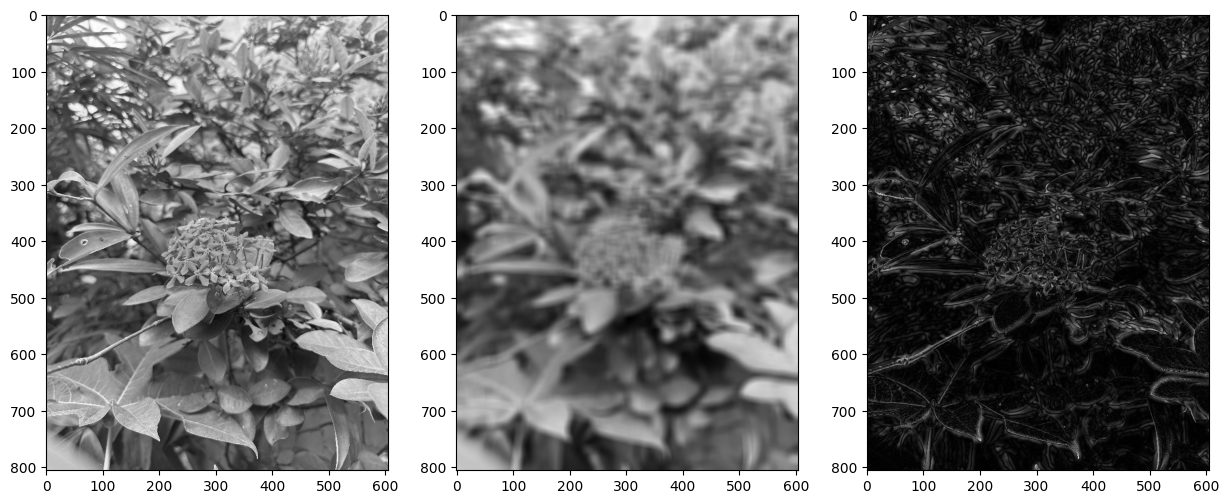

In [6]:
n = 15
ave_kernel = np.ones((n,n))/n**2
conv_ave = signal.convolve2d(img, ave_kernel, boundary='symm',mode='same') 

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,30))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(conv_ave, cmap='gray') 
ax[2].imshow(np.abs(img-conv_ave), cmap='gray')

## The Gaussian Filter

C:\Users\Admin\AppData\Local\Temp\ipykernel_25272\166923846.py:9: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian1D = signal.gaussian(n, std)


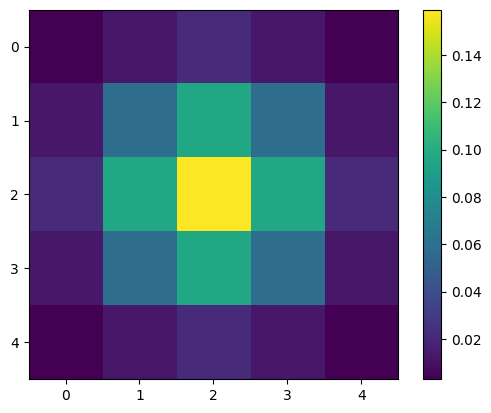

In [11]:
n = 5
assert n % 2 != 0
sigma = 1
def gaussian_kernel(n, std, normalized=False):
    '''
    Generates a n x n matrix with a centered gaussian 
    of standard deviation std centered on it. If normalized,
    its volume equals 1.'''
    gaussian1D = signal.gaussian(n, std)
    gaussian2D = np.outer(gaussian1D, gaussian1D)
    if normalized:
        gaussian2D /= (2*np.pi*(std**2))
    return gaussian2D

gauss_kernel = gaussian_kernel(n, sigma, normalized=True)
plt.imshow(gauss_kernel)
plt.colorbar()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_25272\166923846.py:9: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian1D = signal.gaussian(n, std)


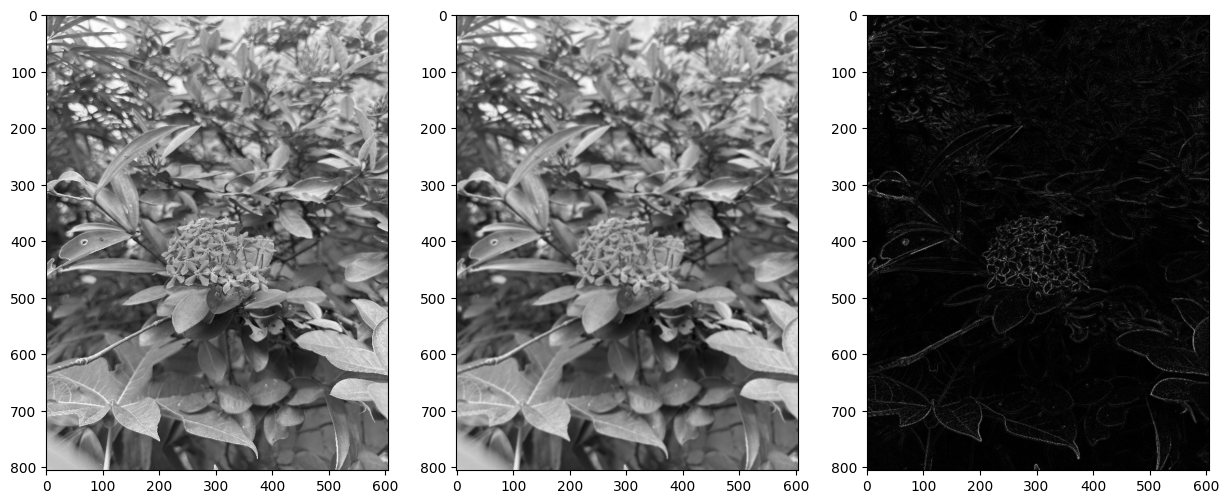

In [15]:
n = 9
assert n % 2 != 0
sigma = 1
gauss_kernel = gaussian_kernel(n, sigma, normalized=True)
conv_gauss = signal.convolve2d(img, gauss_kernel, boundary='symm',mode='same') 

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,30))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(conv_gauss, cmap='gray') 
ax[2].imshow(np.abs(img-conv_gauss), cmap='gray')

## Convolution for simple gradient analysis

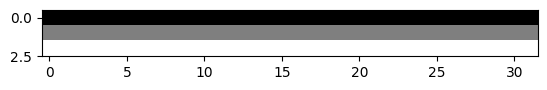

In [16]:
## 3 x m pixels
m = 32
constant_grad = [
    np.zeros((m,)), 
    127*np.ones((m,)), 
    255*np.ones((m,))
]
plt.imshow(constant_grad, cmap='gray')

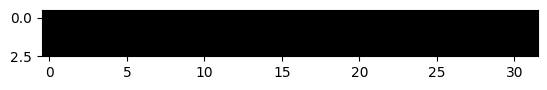

In [17]:
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
G_const = signal.convolve2d(constant_grad, kernel, boundary='symm',mode='same')
plt.imshow(G_const, cmap='gray')
# print(G_const)

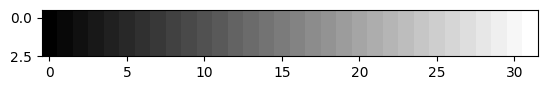

In [19]:
linear_grad = np.array([
    np.linspace(0,255,m),
    np.linspace(0,255,m), 
    np.linspace(0,255,m)
]) / 255.0

plt.imshow(linear_grad, cmap='gray')

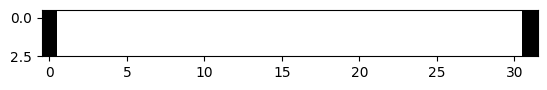

In [22]:
G_lin = signal.convolve2d(linear_grad, kernel, boundary='symm',mode='same')
plt.imshow(G_lin, cmap='gray')
# print(G_lin)

In [23]:
def gaussian_distribution(x, mu, sig):
    return 1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)

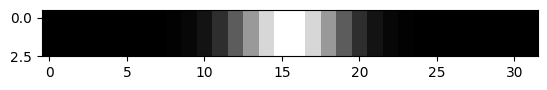

In [24]:
gauss1 = gaussian_distribution(np.linspace(-m,m,m), 0, 5)

gauss_1_grad = np.array([
    gauss1, gauss1, gauss1
])

plt.imshow(gauss_1_grad, cmap='gray')

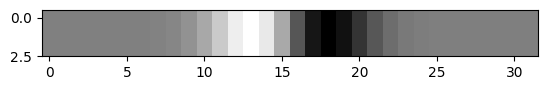

In [25]:
G_gauss1 = signal.convolve2d(gauss_1_grad, kernel, boundary='symm',mode='same')
plt.imshow(G_gauss1, cmap='gray')

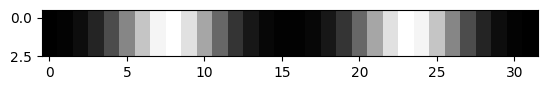

In [26]:
gauss2 = gaussian_distribution(np.linspace(-m,m,m), -m//2, 5)
gauss3 = gaussian_distribution(np.linspace(-m,m,m), m//2, 5)

gauss_mix_grad = np.array([
    gauss2+gauss3, gauss2+gauss3, gauss2+gauss3
])

plt.imshow(gauss_mix_grad, cmap='gray')

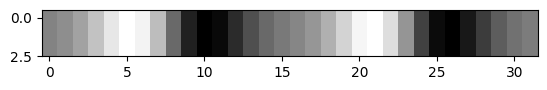

In [207]:
G_gauss_mix = signal.convolve2d(gauss_mix_grad, kernel, boundary='symm',mode='same')
plt.imshow(G_gauss_mix, cmap='gray')

## 2D-Edge Detection

In [27]:
kx = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

In [28]:
ky = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])
ky = kx.T

The gradient magintude can be computed as:
$$|G| = \sqrt{G_x^2 + G_y^2}$$
While the gradient phase as:
$$\phi = tan^{-1}(\frac{G_y}{G_x})$$


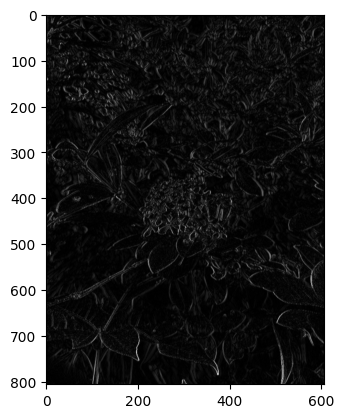

In [29]:
Gx = signal.convolve2d(img, kx, boundary='symm',mode='same')
plt.imshow(np.abs(Gx), cmap='gray')

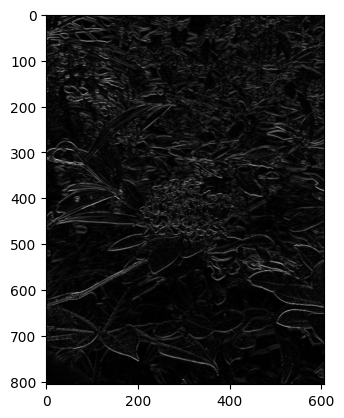

In [30]:
Gy = signal.convolve2d(img, ky, boundary='symm',mode='same')
plt.imshow(np.abs(Gy), cmap='gray')

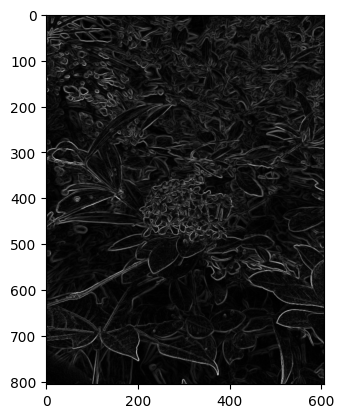

In [31]:
G = np.sqrt(Gx**2 + Gy**2)
plt.imshow(G, cmap='gray')

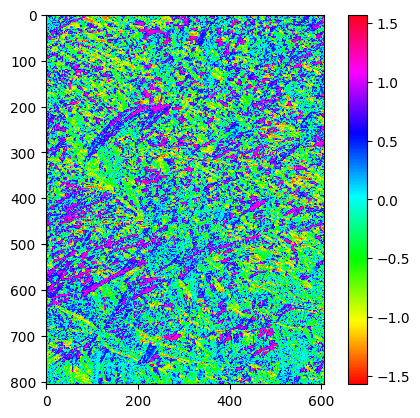

In [32]:
phi = np.arctan(Gy/(Gx+1e-5))
plt.imshow(phi, cmap='hsv')
plt.colorbar()

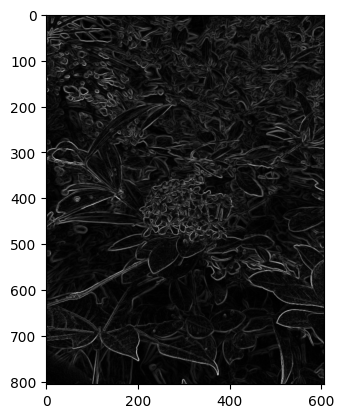

In [33]:
kcx = kx + 1j*ky
Gcx = signal.convolve2d(img, kcx, boundary='symm',mode='same')
plt.imshow(np.abs(Gcx), cmap='gray')

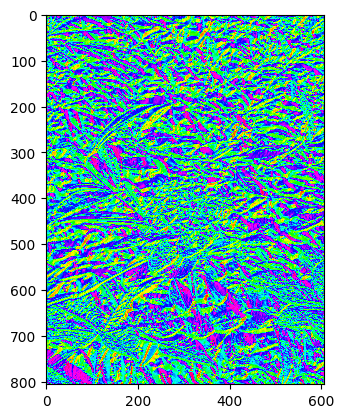

In [34]:
plt.imshow(np.angle(Gcx), cmap='hsv')